## Portfolio Project 1 - Heart Disease Classifier

Team: Derek Cheung, Padrick Beggs, Samantha Shimabukuro

Description: 
- We attempt to determine the presence of heart disease using classical machine learning algorithms given presence of certain features. The dataset was found on the UCI Machine Learning Repository. A copy of the dataset and description can be found there.

In [1]:
# import libraries and data
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, precision_score, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier

In [2]:
df = pd.read_csv("heart.csv")

## Understanding Data

In [3]:
df['age'] = df['age'].apply(lambda x: int(x))
df['sex'] = df['sex'].apply(lambda x: int(x))
df['cp'] = df['cp'].apply(lambda x: int(x))
df['trestbps'] = df['trestbps'].apply(lambda x: int(x))
df['chol'] = df['chol'].apply(lambda x: int(x))
df['fbs'] = df['fbs'].apply(lambda x: int(x))
df['restecg'] = df['restecg'].apply(lambda x: int(x))
df['thalach'] = df['thalach'].apply(lambda x: int(x))
df['exang'] = df['exang'].apply(lambda x: int(x))
df['oldpeak'] = df['oldpeak'].apply(lambda x: float(x))
df['slope'] = df['slope'].apply(lambda x: int(x))
df['ca'] = df['ca'].apply(lambda x: int(x))
df['thal'] = df['thal'].apply(lambda x: int(x))
df['target'] = df['target'].apply(lambda x: int(x))

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Data Exploration

In [6]:
#linearity check
df.corr()[['target']]

,target
age,-0.225439
sex,-0.280937
cp,0.433798
trestbps,-0.144931
chol,-0.085239
fbs,-0.028046
restecg,0.137230
thalach,0.421741
exang,-0.436757
oldpeak,-0.430696


there does not seem to be any feature that has an immediate linear relation with target, so classifer algorithms will be used over regressors

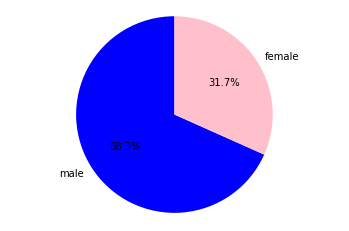

In [7]:
#frequency of gender
labels="male","female"
sizes=[sum(df["sex"]==1),sum(df["sex"]==0)]
colors=["blue","pink"]
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',startangle=90)
plt.axis('equal')
plt.show()

there are more males than females in this dataset

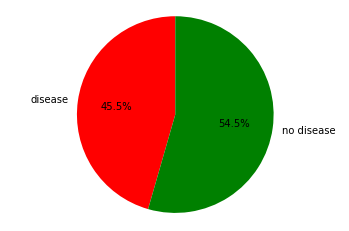

In [8]:
#disease frequency
labels="disease","no disease"
sizes=[sum(df["target"]==0),sum(df["target"]==1)]
colors=["red","green"]
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',startangle=90)
plt.axis('equal')
plt.show()

most individuals in this dataset do no have heart disease

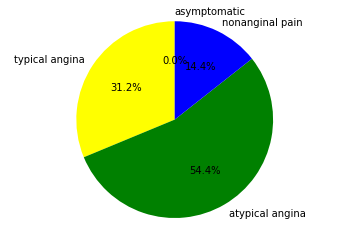

In [9]:
#pain type frequency
labels="typical angina","atypical angina", "nonanginal pain", "asymptomatic"
sizes=[sum(df['cp']==1),sum(df['cp']==2),sum(df['cp']==3),sum(df['cp']==4)]
colors=["yellow","green","blue","black"]
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',startangle=90)
plt.axis('equal')
plt.show()

most individuals in this dataset experience atypical angina chest pain, may be interesting to explore the relationship between type of pain and likeliness of heart disease presence

In [10]:
#bar plot function
def targeted(variable):
    disease=df[df["target"]==0][variable].value_counts()/len(df["target"]==0)
    no_disease=df[df["target"]==1][variable].value_counts()/len(df["target"]==1)
    data=pd.DataFrame([disease,no_disease])
    data.index=["Disease","No Disease"]
    data.plot(kind="bar",stacked=False,title="Percentage")
    return data.head()

,1,0
Disease,0.376238,0.079208
No Disease,0.306931,0.237624


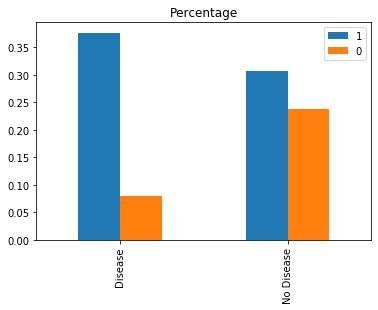

In [11]:
#gender and heart disease
targeted('sex')

most males in the dataset have heart disease, whereas most females in dataset do not have heart disease

,0,1,2,3
Disease,0.343234,0.029703,0.059406,0.023102
No Disease,0.128713,0.135314,0.227723,0.052805


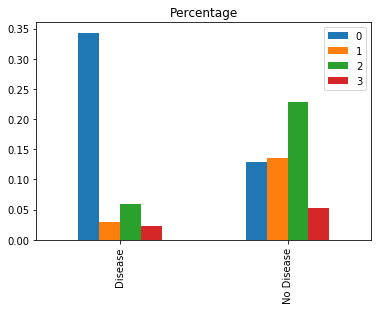

In [12]:
#chest pain and heart disease
targeted('cp')

most indiviuals with heart disease experienced chest pain of type typical angina

,0,1
Disease,0.382838,0.072607
No Disease,0.468647,0.075908


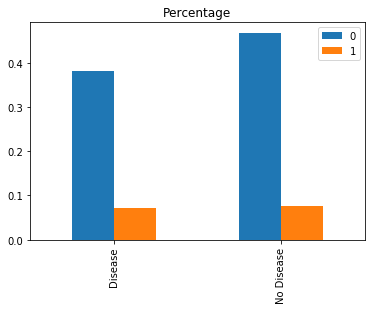

In [13]:
#fasted blood sugar and heart disease
targeted('fbs')

fasting blood sugar does not seem to be super significant in determining presence of heart disease

,0,1,2
Disease,0.260726,0.184818,0.009901
No Disease,0.224422,0.316832,0.003300


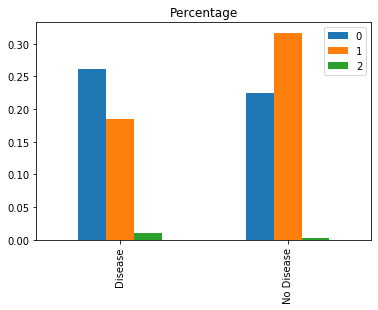

In [14]:
#resting ecg and heart disease
targeted('restecg')

restecg does not seem to be super significant in determining presence of heart disease

,0,1
Disease,0.204620,0.250825
No Disease,0.468647,0.075908


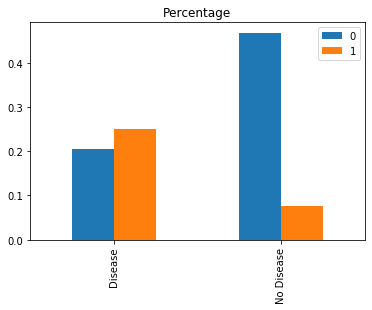

In [15]:
#exercise induced angina and heart disease
targeted('exang')

exercise induced angina does not seem to be a significant indicator of heart disease

,0,1,2
Disease,0.039604,0.300330,0.115512
No Disease,0.029703,0.161716,0.353135


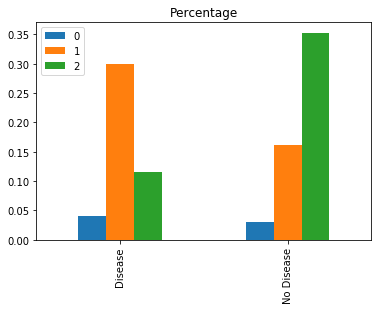

In [16]:
#slope and heart disease
targeted('slope')

a flat slope seems to be a good indicator of heart disease

,0,1,2,3
Disease,0.0033,0.039604,0.118812,0.293729
No Disease,0.0033,0.019802,0.429043,0.092409


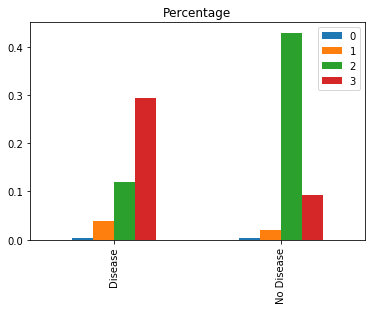

In [17]:
#thal and heart disease
targeted('thal')

a reversible defect seems to be a good indicator of heart disease

In [18]:
#bins for 'binable' groups for continued data exploration
df_temp = df
age_bins = [20,30,40,50,60,70,80]
df_temp['age'] = pd.cut(df_temp['age'], age_bins)

trestbps_bins = [80,120,129,139,140,180,200]
df_temp['trestbps'] = pd.cut(df_temp['trestbps'], trestbps_bins)

chol_bins = [100,200,239,575]
df_temp['chol'] = pd.cut(df_temp['chol'], chol_bins)

thalach_bins = [60,80,100,120,140,160,180,200,220]
df_temp['thalach'] = pd.cut(df_temp['thalach'], thalach_bins)

df_temp['target'] = df['target']

In [19]:
df_temp.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,"(60, 70]",1,3,"(140, 180]","(200, 239]",1,0,"(140, 160]",0,2.3,0,0,1,1
1,"(30, 40]",1,2,"(129, 139]","(239, 575]",0,1,"(180, 200]",0,3.5,0,0,2,1
2,"(40, 50]",0,1,"(129, 139]","(200, 239]",0,0,"(160, 180]",0,1.4,2,0,2,1
3,"(50, 60]",1,1,"(80, 120]","(200, 239]",0,1,"(160, 180]",0,0.8,2,0,2,1
4,"(50, 60]",0,0,"(80, 120]","(239, 575]",0,1,"(160, 180]",1,0.6,2,0,2,1


In [20]:
def targeted_temp(variable):
    disease=df_temp[df_temp["target"]==0][variable].value_counts()/len(df_temp["target"]==0)
    no_disease=df_temp[df_temp["target"]==1][variable].value_counts()/len(df_temp["target"]==1)
    data=pd.DataFrame([disease,no_disease])
    data.index=["Disease","No Disease"]
    data.plot(kind="bar",stacked=False,title="Percentage")
    return data.head()

,"(20, 30]","(30, 40]","(40, 50]","(50, 60]","(60, 70]","(70, 80]"
Disease,0.0000,0.019802,0.075908,0.214521,0.141914,0.003300
No Disease,0.0033,0.039604,0.174917,0.211221,0.099010,0.016502


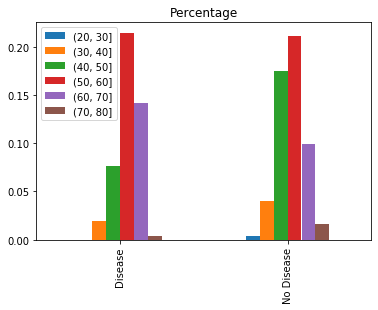

In [21]:
#age and heart disease
targeted_temp('age')

created bins for age based on decades. there seems to be a hike in heart disease for individuals in the age range of 50-70s.

,"(80, 120]","(120, 129]","(129, 139]","(139, 140]","(140, 180]","(180, 200]"
Disease,0.122112,0.069307,0.089109,0.049505,0.118812,0.006601
No Disease,0.198020,0.056106,0.145215,0.056106,0.089109,0.000000


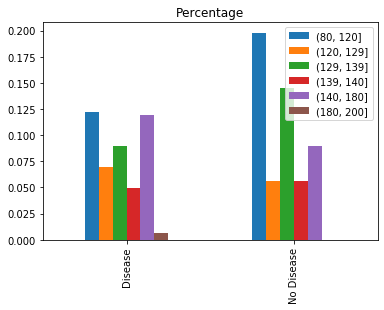

In [22]:
#systolic blood pressure and heart disease
targeted_temp('trestbps')

created bins based on healthy to unhealthy resting blood pressure rates. it would be good to note that the blood pressure in data was the systoli blood pressure (usually the bigger number quoted in a reading).
- normal: < 120
- elevated: 120 <= x <= 129
- high 1: 130 <= x <= 139
- high 2: 140 <= x <= 180
- crisis: 180 <

,"(239, 575]","(200, 239]","(100, 200]"
Disease,0.260726,0.125413,0.069307
No Disease,0.250825,0.194719,0.099010


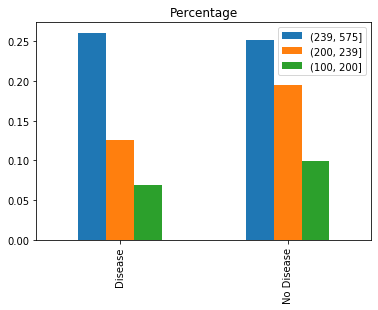

In [23]:
#cholesterol and heart disease
targeted_temp('chol')

created bins based on healthy to unhealthy cholesterol levels.
- desireable: < 200
- borderline: 200 <= x <= 239
- high risk: 239 <

,"(60, 80]","(80, 100]","(100, 120]","(120, 140]","(140, 160]","(160, 180]","(180, 200]","(200, 220]"
Disease,0.0033,0.019802,0.075908,0.115512,0.158416,0.072607,0.009901,0.0000
No Disease,0.0000,0.003300,0.019802,0.062706,0.178218,0.231023,0.046205,0.0033


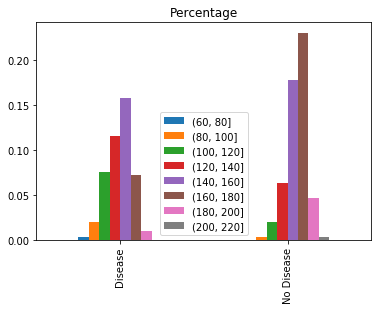

In [24]:
#max heart rate and heart disease
targeted_temp('thalach')

## Feature Engineering

from the above data exploration, the following features will be selected to be implemented into the classifier model:
- age 
- sex
- cp
- trestbps
- chol
- ca
- thal
- target
- exang

and the following less relatable features will be removed: 
- fbs
- restecg
- thalach
- oldpeak
- slope

In [25]:
#df_enr is the new engineered data frame.
df_eng = df[["age", "sex", "cp", "trestbps", "chol", "exang", "ca", "thal", "target"]]
df_eng.head()

,age,sex,cp,trestbps,chol,exang,ca,thal,target
0,"(60, 70]",1,3,"(140, 180]","(200, 239]",0,0,1,1
1,"(30, 40]",1,2,"(129, 139]","(239, 575]",0,0,2,1
2,"(40, 50]",0,1,"(129, 139]","(200, 239]",0,0,2,1
3,"(50, 60]",1,1,"(80, 120]","(200, 239]",0,0,2,1
4,"(50, 60]",0,0,"(80, 120]","(239, 575]",1,0,2,1


In [26]:
#shuffle data for training, validation, testing
df_eng = df_eng.sample(frac=1)
df_eng.head(20)

,age,sex,cp,trestbps,chol,exang,ca,thal,target
201,"(50, 60]",1,0,"(120, 129]","(239, 575]",1,1,3,0
140,"(50, 60]",0,2,"(80, 120]","(239, 575]",0,0,2,1
178,"(40, 50]",1,0,"(80, 120]","(100, 200]",1,0,3,0
44,"(30, 40]",1,2,"(139, 140]","(239, 575]",0,0,2,1
126,"(40, 50]",1,0,"(80, 120]","(200, 239]",0,0,2,1
257,"(40, 50]",1,0,"(140, 180]","(100, 200]",1,0,3,0
38,"(60, 70]",0,2,"(140, 180]","(239, 575]",0,0,2,1
82,"(50, 60]",0,2,"(80, 120]","(239, 575]",0,1,2,1
234,"(60, 70]",1,0,"(129, 139]","(239, 575]",0,3,2,0
224,"(50, 60]",1,0,"(80, 120]","(200, 239]",1,1,3,0


In [27]:
#MinMax scaler on int values from df_eng
regressionFeatures =  MinMaxScaler().fit_transform(df_eng[['sex','cp','exang','ca','thal','target']])
df_regressionFeatures = pd.DataFrame(regressionFeatures, columns = ['sex','cp','exang','ca','thal','target'])

In [28]:
#dummies on binned values from df_eng
classFeatures = pd.get_dummies(df_eng[['age','trestbps','chol']])
df_classFeature_dummies = pd.DataFrame(classFeatures)

for the categories in bins, utilize get dummies to convert to numerical values

In [29]:
dfFull = pd.concat([df_regressionFeatures,df_classFeature_dummies], axis = 1)
dfFull = dfFull.dropna()
dfFull.head()

,sex,cp,exang,ca,thal,target,"age_(20, 30]","age_(30, 40]","age_(40, 50]","age_(50, 60]",...,"age_(70, 80]","trestbps_(80, 120]","trestbps_(120, 129]","trestbps_(129, 139]","trestbps_(139, 140]","trestbps_(140, 180]","trestbps_(180, 200]","chol_(100, 200]","chol_(200, 239]","chol_(239, 575]"
0,1.0,0.000000,1.0,0.25,1.000000,0.0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,0.0,0.666667,0.0,0.00,0.666667,1.0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,1.0,0.000000,1.0,0.00,1.000000,0.0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
3,1.0,0.666667,0.0,0.00,0.666667,1.0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
4,1.0,0.000000,0.0,0.00,0.666667,1.0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1


In [30]:
dfFull.describe()

,sex,cp,exang,ca,thal,target,"age_(20, 30]","age_(30, 40]","age_(40, 50]","age_(50, 60]",...,"age_(70, 80]","trestbps_(80, 120]","trestbps_(120, 129]","trestbps_(129, 139]","trestbps_(139, 140]","trestbps_(140, 180]","trestbps_(180, 200]","chol_(100, 200]","chol_(200, 239]","chol_(239, 575]"
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,...,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,0.683168,0.322332,0.326733,0.182343,0.771177,0.544554,0.003300,0.059406,0.250825,0.425743,...,0.019802,0.320132,0.125413,0.234323,0.105611,0.207921,0.006601,0.168317,0.320132,0.511551
std,0.466011,0.344017,0.469794,0.255652,0.204092,0.498835,0.057448,0.236774,0.434205,0.495273,...,0.139550,0.467299,0.331734,0.424276,0.307847,0.406491,0.081110,0.374766,0.467299,0.500693
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.666667,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.333333,0.000000,0.000000,0.666667,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.666667,1.000000,0.250000,1.000000,1.000000,0.000000,0.000000,0.500000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Machine Learning

In [31]:
#features
X = dfFull[['sex','cp','exang','ca','thal','age_(20, 30]','age_(30, 40]','age_(40, 50]','age_(50, 60]','age_(60, 70]','age_(70, 80]','trestbps_(80, 120]','trestbps_(120, 129]','trestbps_(129, 139]','trestbps_(139, 140]','trestbps_(140, 180]','trestbps_(180, 200]','chol_(100, 200]','chol_(200, 239]','chol_(239, 575]']]
y = dfFull['target']

utilized a standard 60,20,20 split for training, validation, testing

In [32]:
lenTrain, lenVal = 182, 60

In [33]:
X_train, X_val, X_test = X[:lenTrain], X[lenTrain:(lenTrain+lenVal)], X[(lenTrain+lenVal):]
y_train, y_val, y_test = y[:lenTrain], y[lenTrain:(lenTrain+lenVal)], y[(lenTrain+lenVal):]

In [34]:
#SGDClassifier
gridSGD = GridSearchCV(
    estimator=SGDClassifier(), 
    param_grid={'loss':['hinge','log','modified_huber','squared_hinge','perceptron']},
    scoring="precision", cv=5)
gridSGD.fit(X_train, y_train)
print (gridSGD.best_estimator_)
print (gridSGD.best_score_)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)
0.8558752052545155


In [35]:
#GaussianNB
gridGNB = GridSearchCV(
    estimator=GaussianNB(), 
    param_grid={},
    scoring="precision", cv=5)
gridGNB.fit(X_train, y_train)
print (gridGNB.best_estimator_)
print (gridGNB.best_score_)

GaussianNB(priors=None, var_smoothing=1e-09)
0.5329923273657289


C:\Users\dcheu\Anaconda3\envs\PythonGPU\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dcheu\Anaconda3\envs\PythonGPU\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
#KNeighborsClassifier
gridKNN = GridSearchCV(
    estimator=KNeighborsClassifier(), 
    param_grid={'n_neighbors': [3, 5, 7, 10, 15, 30], "weights": ["distance", "uniform"], 'algorithm':['ball_tree','kd_tree','brute','auto']},
    scoring="precision", cv=5)
gridKNN.fit(X_train, y_train)
print (gridKNN.best_estimator_)
print (gridKNN.best_score_)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=30, p=2,
                     weights='distance')
0.7155526277265407


In [37]:
#SVC
gridSVC = GridSearchCV(
    estimator=SVC(), 
    param_grid={},
    scoring="precision", cv=5)
gridSVC.fit(X_train, y_train)
print (gridSVC.best_estimator_)
print (gridSVC.best_score_)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
0.8033888888888889


In [38]:
#DecisionTreeClassifier
gridTree = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42), 
    param_grid={'criterion':['gini','entropy'],'splitter':['best','random'],'max_depth': [None,3,5,10,15,20]}, 
    scoring="precision", cv=5)
gridTree.fit(X_train, y_train)
print(gridTree.best_estimator_)
print(gridTree.best_score_)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='random')
0.8513538748832866


In [39]:
#RandomForestClassifier
gridForest = GridSearchCV(
    estimator= RandomForestClassifier(random_state=42), 
    param_grid={'criterion':['gini','entropy'],'max_depth': [None,3,5,10,15,20]}, 
    scoring="precision", cv=5)
gridForest.fit(X_train, y_train)
print(gridForest.best_estimator_)
print(gridForest.best_score_)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
0.8763492063492064


In [40]:
#AdaBoostClassifier
adaParams = {"base_estimator":[None,
    DecisionTreeClassifier(max_depth=5,criterion='gini',splitter='best'),
    DecisionTreeClassifier(max_depth=10,criterion='gini',splitter='best'),
    DecisionTreeClassifier(max_depth=15,criterion='gini',splitter='best'),
    DecisionTreeClassifier(max_depth=5,criterion='entropy',splitter='best'),
    DecisionTreeClassifier(max_depth=10,criterion='entropy',splitter='best'),
    DecisionTreeClassifier(max_depth=15,criterion='entropy',splitter='best'),
    DecisionTreeClassifier(max_depth=5,criterion='gini',splitter='random'),
    DecisionTreeClassifier(max_depth=10,criterion='gini',splitter='random'),
    DecisionTreeClassifier(max_depth=15,criterion='gini',splitter='random'),
    DecisionTreeClassifier(max_depth=5,criterion='entropy',splitter='random'),
    DecisionTreeClassifier(max_depth=10,criterion='entropy',splitter='random'),
    DecisionTreeClassifier(max_depth=15,criterion='entropy',splitter='random')],
    "n_estimators":[5, 10, 30, 50, 60],"learning_rate":[.5, 1.0, 1.5],'algorithm':['SAMME', 'SAMME.R']}

gridBoost = GridSearchCV(
    estimator= AdaBoostClassifier(random_state=42), 
    param_grid=adaParams, 
    scoring="precision", cv=5)
gridBoost.fit(X_train, y_train)
print(gridBoost.best_estimator_)
print(gridBoost.best_score_)

AdaBoostClassifier(algorithm='SAMME', base_estimator=None, learning_rate=0.5,
                   n_estimators=10, random_state=42)
0.8807936507936509


In [41]:
#BaggingClassifier
bagParams = {"base_estimator":[None, 
    KNeighborsClassifier(n_neighbors=5, weights='uniform'), 
    KNeighborsClassifier(n_neighbors=10, weights='uniform'), 
    KNeighborsClassifier(n_neighbors=12, weights='uniform'), 
    KNeighborsClassifier(n_neighbors=15, weights='uniform'), 
    KNeighborsClassifier(n_neighbors=5, weights='distance'), 
    KNeighborsClassifier(n_neighbors=10, weights='distance'), 
    KNeighborsClassifier(n_neighbors=12, weights='distance'), 
    KNeighborsClassifier(n_neighbors=15, weights='distance'), 
    DecisionTreeClassifier(max_depth=5,criterion='gini',splitter='best'),
    DecisionTreeClassifier(max_depth=10,criterion='gini',splitter='best'),
    DecisionTreeClassifier(max_depth=15,criterion='gini',splitter='best'),
    DecisionTreeClassifier(max_depth=5,criterion='entropy',splitter='best'),
    DecisionTreeClassifier(max_depth=10,criterion='entropy',splitter='best'),
    DecisionTreeClassifier(max_depth=15,criterion='entropy',splitter='best'),
    DecisionTreeClassifier(max_depth=5,criterion='gini',splitter='random'),
    DecisionTreeClassifier(max_depth=10,criterion='gini',splitter='random'),
    DecisionTreeClassifier(max_depth=15,criterion='gini',splitter='random'),
    DecisionTreeClassifier(max_depth=5,criterion='entropy',splitter='random'),
    DecisionTreeClassifier(max_depth=10,criterion='entropy',splitter='random'),
    DecisionTreeClassifier(max_depth=15,criterion='entropy',splitter='random')],
    "n_estimators":[5, 10, 30, 50, 60]}

gridBag = GridSearchCV(
    estimator=BaggingClassifier(random_state=42), 
    param_grid=bagParams, 
    scoring="precision", cv=3)
gridBag.fit(X_train, y_train)
print(gridBag.best_estimator_)
print(gridBag.best_score_)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=5,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,
   

best algorithms are SGDClassifier, RandomForestClassifier, AdaBoostClassifier

In [42]:
#validation test
SGDval = SGDClassifier()
SGDval.fit(X_train, y_train)
y_SGDval = SGDval.predict(X_val)
score_SGDval= precision_score(y_val,y_SGDval)
print(score_SGDval)

ForestVal = RandomForestClassifier()
ForestVal.fit(X_train, y_train)
y_ForestVal = ForestVal.predict(X_val)
score_ForestVal= precision_score(y_val,y_ForestVal)
print(score_ForestVal)

adaVal = AdaBoostClassifier()
adaVal.fit(X_train, y_train)
y_adaVal = adaVal.predict(X_val)
score_adaVal = precision_score(y_val,y_adaVal)
print(score_adaVal)

0.68
0.7222222222222222
0.7435897435897436


In [43]:
#SGDClassifier Test w best algo
sgd_best = SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)
sgd_best.fit(X_train, y_train)
y_sgdTest = sgd_best.predict(X_test)
score_sgdTest = precision_score(y_test, y_sgdTest)
print(score_sgdTest)

0.71875


In [44]:
#RandomForestClassifier Test w best algo
Forest_best = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
Forest_best.fit(X_train, y_train)
y_ForestTest = Forest_best.predict(X_test)
score_ForestTest = precision_score(y_test, y_ForestTest)
print(score_ForestTest)

0.7575757575757576


In [45]:
#AdaBoostClassifier Test w best algo
ada_best = AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=5, random_state=42)
ada_best.fit(X_train, y_train)
y_adaTest = ada_best.predict(X_test)
score_adaTest = precision_score(y_test, y_adaTest)
print(score_adaTest)

0.75


## Result Analysis

Testing the best algorithms on the test data, a range of .7185-.7576 precision is achieved. Although this is very precise, reliance on this model for diagnosis of heart disease is not recommended. This model would better be used for indication of heart disease and could be used to aid a medical proffesional in diagnosis. To further increase performance of this model, a dataset with more data points and a better understanding of medicine would be needed. More data points (about 2000-3000) would work best in this setting as classical machine learning algorithms perform best with data in the indicated range. A better understanding of medicine would also improve results, perhaps even without a bigger dataset. For example, in data exploration and feature engineering, features were removed based on visual assumptions from graphs. With a better understanding of medicine, features and their correlations with heart disease could be better explored and implemented in the model.